In [1]:
import numpy as np

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical   
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Layers = []
LearnRate = []
Drop = []
Processing_Time = []
Training_Set_Accuracy = []
Test_Set_Accuracy = []
History = []
Predicts = []
Classes = []

Using TensorFlow backend.


In [3]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)


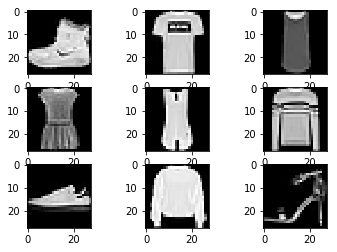

In [5]:
# plot first few images
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
max_epochs = 100  
earlystop_callback = \
    tf.keras.callbacks.EarlyStopping(monitor='val_acc',\
    min_delta=0.01, patience=5, verbose=0, mode='auto',\
    baseline=None, restore_best_weights=False)

In [7]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_split = 0.2,
         callbacks=[earlystop_callback])

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28)

In [2]:
#Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
 

In [ ]:
#Prep Data
# convert from integers to floats
train_norm = train.astype('float32')
test_norm = test.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
